In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
df = pd.read_csv("pakistani_ecommerce_mock_data.csv")
df.head()

,Customer_ID,Order_Date,Category,Product,Order_Amount,Payment_Method,Shipping_Status,Customer_Location,Discount_Applied,Rating
0,9847,2023-01-01,Automobiles,Tecno Camon 17,72553.82,Bank Transfer,Cancelled,Quetta,Yes,1
1,4006,2023-01-01,Books & Stationery,Board Game,7986.23,Bank Transfer,Shipped,Rawalpindi,No,1
2,2256,2023-01-01,Books & Stationery,Badminton Set,60055.49,EasyPaisa,Returned,Lahore,Yes,3
3,8077,2023-01-01,Beauty & Personal Care,Dawlance Microwave,18276.04,JazzCash,Returned,Peshawar,No,4
4,6351,2023-01-01,Beauty & Personal Care,Infinix Hot 11,14997.67,Credit/Debit Card,Returned,Karachi,Yes,4


# Find the Most Sold Product Categories

In [14]:
category_counts = df["Category"].value_counts()

# Display top categories
print("Most Sold Product Categories:\n", category_counts)

Most Sold Product Categories:
 Category
Toys & Baby Products      358
Home Appliances           324
Books & Stationery        318
Beauty & Personal Care    315
Automobiles               311
Sports & Fitness          298
Fashion                   297
Mobiles & Accessories     279
Name: count, dtype: int64


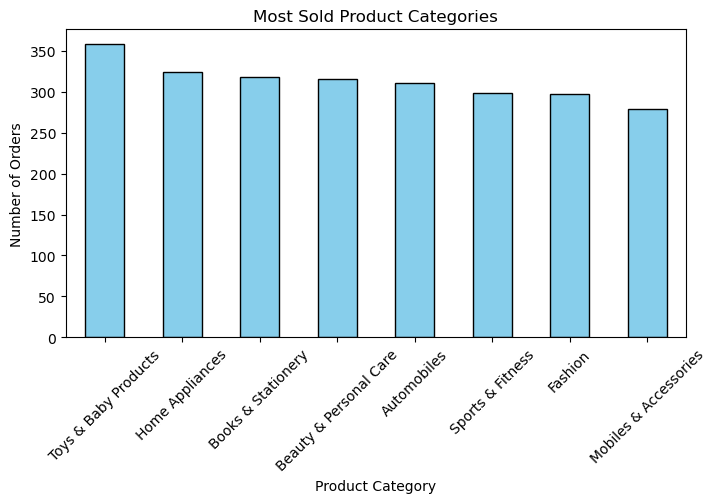

In [15]:
plt.figure(figsize=(8, 4))
category_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.title("Most Sold Product Categories")
plt.xticks(rotation=45)
plt.show()

# Check the Average Order Amount per Category

In [16]:
# Calculate average order amount per category
avg_order_amount = df.groupby("Category")["Order_Amount"].mean().sort_values(ascending=False)

# Display average order amounts
print("Average Order Amount per Category:\n", avg_order_amount)

Average Order Amount per Category:
 Category
Sports & Fitness          52867.902987
Mobiles & Accessories     51402.894301
Fashion                   51287.973636
Toys & Baby Products      50577.074022
Beauty & Personal Care    49894.047460
Home Appliances           49684.520309
Automobiles               49196.876334
Books & Stationery        47067.657736
Name: Order_Amount, dtype: float64


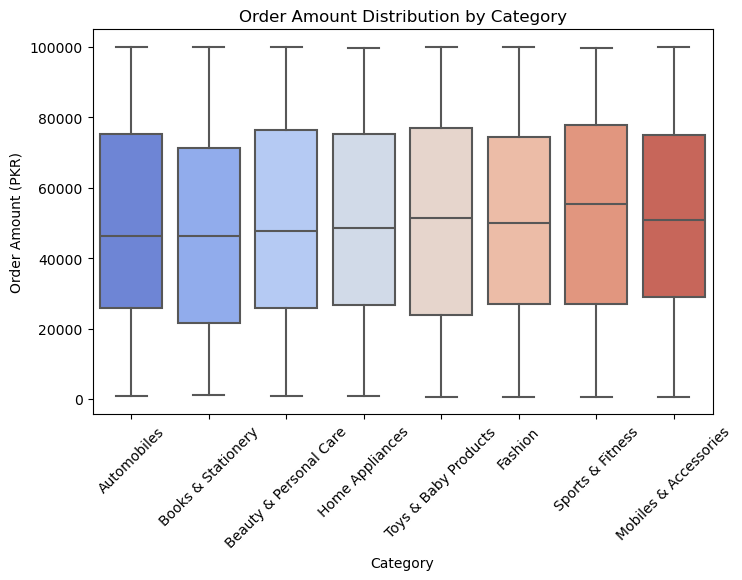

In [18]:
# Boxplot of Order Amounts by Category

plt.figure(figsize=(8, 5))
sns.boxplot(x="Category", y="Order_Amount", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Order Amount (PKR)")
plt.title("Order Amount Distribution by Category")
plt.show()

# Identify the Most Used Payment Methods

In [19]:
# Count payment method usage
payment_counts = df["Payment_Method"].value_counts()

# Display most used payment methods
print("Most Used Payment Methods:\n", payment_counts)

Most Used Payment Methods:
 Payment_Method
Bank Transfer        536
Credit/Debit Card    522
EasyPaisa            499
JazzCash             474
Cash on Delivery     469
Name: count, dtype: int64


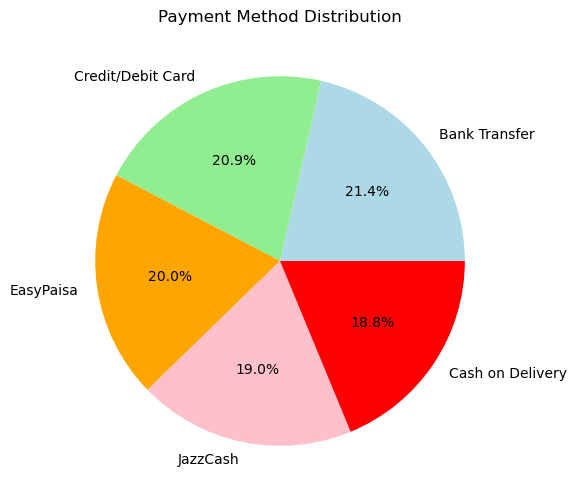

In [20]:
# Pie Chart of Payment Methods

plt.figure(figsize=(6, 6))
payment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightgreen", "orange", "pink", "red"])
plt.title("Payment Method Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

# Find the Top 3 Cities with the Highest Orders

In [21]:
# Count orders by city
city_counts = df["Customer_Location"].value_counts().head(3)

# Display top 3 cities
print("Top 3 Cities with the Highest Orders:\n", city_counts)

Top 3 Cities with the Highest Orders:
 Customer_Location
Multan        337
Faisalabad    325
Lahore        321
Name: count, dtype: int64


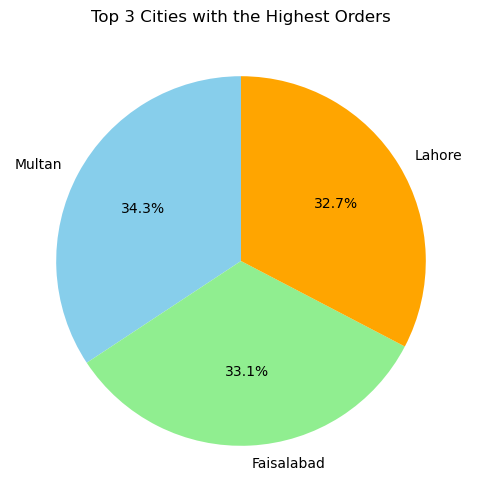

In [32]:
import matplotlib.pyplot as plt

# Get top 3 cities
top_cities = df["Customer_Location"].value_counts().head(3)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(top_cities, labels=top_cities.index, autopct="%1.1f%%", colors=["skyblue", "lightgreen", "orange"], startangle=90)
plt.title("Top 3 Cities with the Highest Orders")
plt.show()

# Customer Spending Behavior (Who Spends the Most?)

In [22]:
# Find total spending per customer
customer_spending = df.groupby("Customer_ID")["Order_Amount"].sum().sort_values(ascending=False)

# Display top 5 biggest spenders
print("Top 5 Customers by Spending:\n", customer_spending.head())

Top 5 Customers by Spending:
 Customer_ID
9839    317404.31
6442    263338.26
5719    255413.80
3038    230256.34
7918    224050.38
Name: Order_Amount, dtype: float64


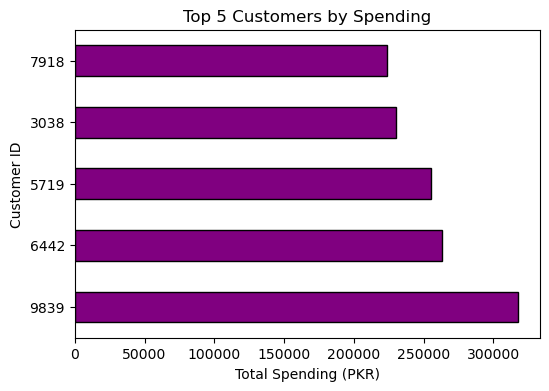

In [33]:
# Get top 5 spenders
top_spenders = df.groupby("Customer_ID")["Order_Amount"].sum().sort_values(ascending=False).head(5)

# Horizontal bar chart
plt.figure(figsize=(6,4))
top_spenders.plot(kind="barh", color="purple", edgecolor="black")

plt.xlabel("Total Spending (PKR)")
plt.ylabel("Customer ID")
plt.title("Top 5 Customers by Spending")
plt.show()

# Impact of Discounts (Do Customers Who Use Discounts Buy More?)

In [23]:
# Compare average order amounts for discounted vs. non-discounted purchases
avg_spending_discount = df.groupby("Discount_Applied")["Order_Amount"].mean()

# Display results
print("Average Order Amount with and without Discount:\n", avg_spending_discount)

Average Order Amount with and without Discount:
 Discount_Applied
No     49719.254050
Yes    51294.423786
Name: Order_Amount, dtype: float64


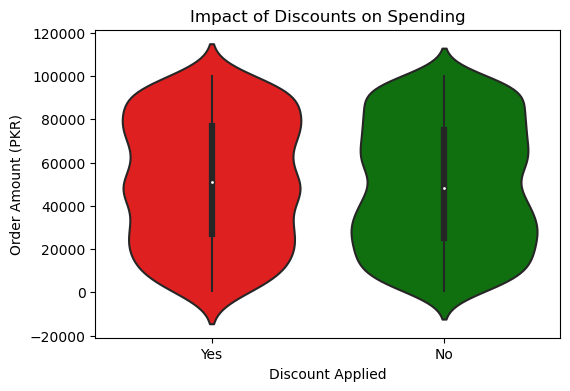

In [39]:
import seaborn as sns

# Violin plot
plt.figure(figsize=(6,4))
sns.violinplot(x="Discount_Applied", y="Order_Amount", data=df, palette=["red", "green"])

plt.xlabel("Discount Applied")
plt.ylabel("Order Amount (PKR)")
plt.title("Impact of Discounts on Spending")
plt.show()

# Ratings Analysis (Best & Worst Rated Categories)

In [25]:
# Find the average rating per category
category_ratings = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

# Display top and bottom rated categories
print("Best Rated Categories:\n", category_ratings.head(3))
print("\nWorst Rated Categories:\n", category_ratings.tail(3))


Best Rated Categories:
 Category
Automobiles              3.131833
Mobiles & Accessories    3.103943
Toys & Baby Products     3.000000
Name: Rating, dtype: float64

Worst Rated Categories:
 Category
Sports & Fitness      2.973154
Fashion               2.912458
Books & Stationery    2.889937
Name: Rating, dtype: float64


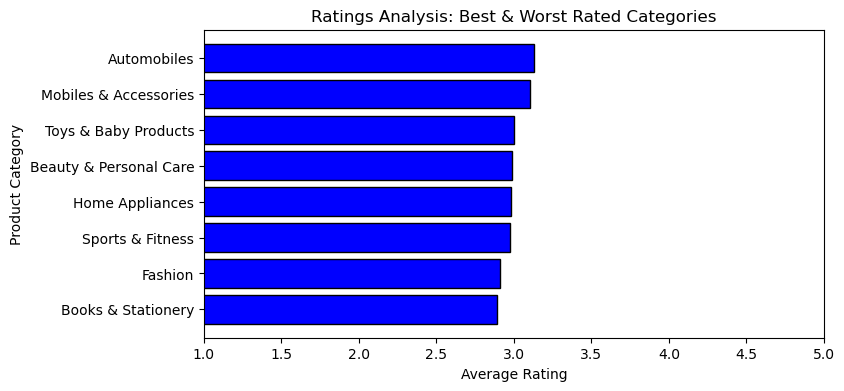

In [41]:
# Get average rating per category
category_ratings = df.groupby("Category")["Rating"].mean().sort_values()

# Horizontal Bar Chart for Better Readability
plt.figure(figsize=(8,4))
plt.barh(category_ratings.index, category_ratings.values, color="blue", edgecolor="black")

plt.xlabel("Average Rating")
plt.ylabel("Product Category")
plt.title("Ratings Analysis: Best & Worst Rated Categories")
plt.xlim(1, 5)  # Rating scale from 1 to 5
plt.show()

# Final Insights from EDA